# Aliaksei Kandratsenka

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plots
import seaborn as sns
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Cleaning Data

In [2]:
hct_data = pd.read_csv("horse-colic.csv")
hct_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
print("Shape of data (samples, features): ",hct_data.shape)

Shape of data (samples, features):  (299, 28)


Inspecting nature of data, it can be seen that data consists of 17 categorical features and rest numerical out of 28.

In [4]:
hct_data.dtypes.value_counts()

object     17
float64     7
int64       4
dtype: int64

Checking missing values for each feature

([<matplotlib.axis.XTick at 0x26cd67a5c50>,
 <a list of 28 Text xticklabel objects>)

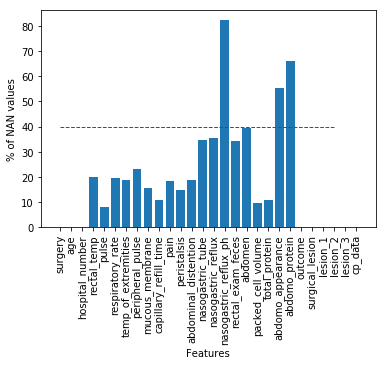

In [5]:
nan_per = hct_data.isna().sum()/len(hct_data)*100
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40,40], 'r--', lw=1)
plt.xticks(list(range(len(hct_data.columns))),list(hct_data.columns.values),rotation='vertical')

The graph shows the number of Missing values in each feature, most of the features have less than 40% missing values.

Dividing Categorical and Numerical Data

In [6]:
obj_columns = []
nonobj_columns = []
for col in hct_data.columns.values:
    if hct_data[col].dtype == 'object':
        obj_columns.append(col)
    else:
        nonobj_columns.append(col)
print(len(obj_columns)," Object Columns are \n",obj_columns,'\n')
print(len(nonobj_columns),"Non-object columns are \n",nonobj_columns)

data_obj = hct_data[obj_columns]
data_nonobj = hct_data[nonobj_columns]

17  Object Columns are 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'] 

11 Non-object columns are 
 ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


Removing and Filling Missing Values in Numerical and Categorical Data

1. For columns with more than 40% NAN Value : Remove Columns
2. For columns with less than 40% NAN Value
    For Numerical Data: Replace NAN values with median value of that
    particular column
    For Categorical Data: Replace NAN values with mode value of that
    particular column

In [7]:
print("Data Size Before Numerical NAN Column(>40%) Removal :",data_nonobj.shape)
for col in data_nonobj.columns.values:
    if (pd.isna(data_nonobj[col]).sum())>0:
        if pd.isna(data_nonobj[col]).sum() > (40/100*len(data_nonobj)):
            print(col,"removed")
            data_nonobj=data_nonobj.drop([col], axis=1)
        else:
            data_nonobj[col]=data_nonobj[col].fillna(data_nonobj[col].median())
print("Data Size After Numerical NAN Column(>40%) Removal :",data_nonobj.shape)

Data Size Before Numerical NAN Column(>40%) Removal : (299, 11)
nasogastric_reflux_ph removed
abdomo_protein removed
Data Size After Numerical NAN Column(>40%) Removal : (299, 9)


C:\Users\leone\Anaconda3\envs\ta\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
print("Data Size Before Categorical NAN Column(>40%) Removal :",data_obj.shape)
for col in data_obj.columns.values:
    if (pd.isna(data_obj[col]).sum())>0:
        if pd.isna(data_obj[col]).sum() > (40/100*len(data_nonobj)):
            print(col,"removed")
            data_obj=data_obj.drop([col], axis=1)
        else:
            data_obj[col]=data_obj[col].fillna(data_obj[col].mode()[0])
print("Data Size After Categorical NAN Column(>40%) Removal :",data_obj.shape)

Data Size Before Categorical NAN Column(>40%) Removal : (299, 17)


C:\Users\leone\Anaconda3\envs\ta\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


abdomo_appearance removed
Data Size After Categorical NAN Column(>40%) Removal : (299, 16)


Converting Categorical Data to Numerical and Merging Them

In [10]:
for col in data_obj.columns.values:
    data_obj[col]=data_obj[col].astype('category').cat.codes
data_merge=pd.concat([data_nonobj,data_obj],axis=1)

target=hct_data['outcome']
print(target.value_counts())
target=data_merge['outcome']
print(target.value_counts())

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64
2    178
0     77
1     44
Name: outcome, dtype: int64


It shall be noted that numeric 0,1,2 are equivalent to died, euthanized, lived for outcome.

Inspecting Correlation between various Features and Outcome

Correlation shows how strongly features are related to each other. We will be checking correlation of each column with outcome.

If correlation value is positive, fetaure is positively correlated to outcome.
If correlation value is negative, feature is negatively correlated to outcome.
If correlation value is 0, two columns are not correlated.

    |value| > 0.7 : Hight correlated
    0.7 < |value| > 0.3 : Moderately correlated
    0.3 < |value| > 0 : Weakly correlated

Correlation of mentioned features wrt outcome in ascending order
outcome                  1.000000
packed_cell_volume       0.398371
pulse                    0.335550
surgical_lesion          0.332933
temp_of_extremities      0.290367
total_protein            0.265889
capillary_refill_time    0.256294
abdomen                  0.214875
rectal_exam_feces        0.193004
surgery                  0.189222
nasogastric_reflux       0.181422
peristalsis              0.165844
peripheral_pulse         0.165719
pain                     0.161964
abdominal_distention     0.112309
hospital_number          0.106396
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
cp_data                  0.078066
respiratory_rate         0.068581
mucous_membrane          0.056852
nasogastric_tube         0.049156
lesion_3                 0.044631
rectal_temp              0.013273
Name: outcome, dtype: float64


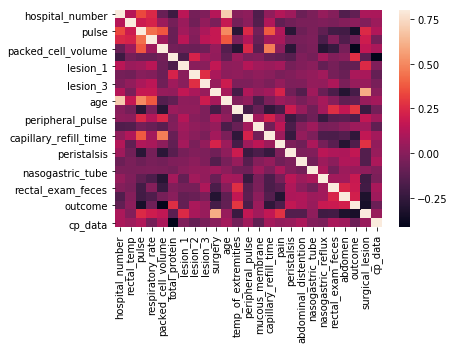

In [11]:
train_corr=data_merge.corr()
sns.heatmap(train_corr, vmax=0.8)
corr_values=train_corr['outcome'].sort_values(ascending=False)
corr_values=abs(corr_values).sort_values(ascending=False)
print("Correlation of mentioned features wrt outcome in ascending order")
print(abs(corr_values).sort_values(ascending=False))

Removing unwanted very less correlated features

In [12]:
print("Data Size Before Correlated Column Removal :",data_merge.shape)

for col in range(len(corr_values)):
        if abs(corr_values[col]) < 0.1:
            data_merge=data_merge.drop([corr_values.index[col]], axis=1)
            print(corr_values.index[col],"removed")
print("Data Size After Correlated Column Removal :",data_merge.shape)

Data Size Before Correlated Column Removal : (299, 25)
lesion_2 removed
cp_data removed
respiratory_rate removed
mucous_membrane removed
nasogastric_tube removed
lesion_3 removed
rectal_temp removed
Data Size After Correlated Column Removal : (299, 18)


To better understand, how two features are correlated. Let us plot two most correlated (to outcome) features as histogram and kde plot.

1. Packed Cell Volume & Outcome

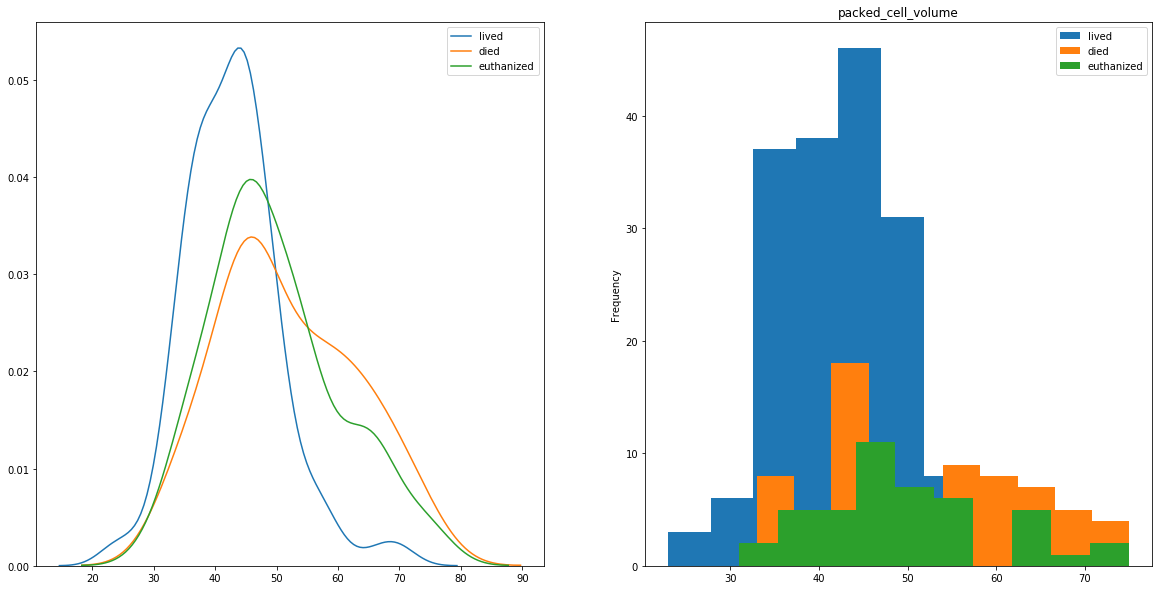

In [13]:
#packed_cell_volume 
col = 'packed_cell_volume'
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = [20,10])

y = data_merge[col][target == 2]
x = data_merge['outcome'][target == 2]
y.plot.hist(ax = ax2)
sns.kdeplot(y, ax = ax1)

y = data_merge[col][target == 0]
x = data_merge['outcome'][target == 0]
y.plot.hist(ax = ax2)
sns.kdeplot(y, ax = ax1)

y = data_merge[col][target == 1]
x = data_merge['outcome'][target == 1]
y.plot.hist(ax = ax2)
sns.kdeplot(y, ax = ax1)

plt.title(col)
ax1.legend(['lived','died','euthanized'])
ax2.legend(['lived','died','euthanized'])
plt.show()

The plots show that after approx 50, outcome is most likely to be euthanized, and after 60, it is likely to be died.

2. Pulse & Outcome

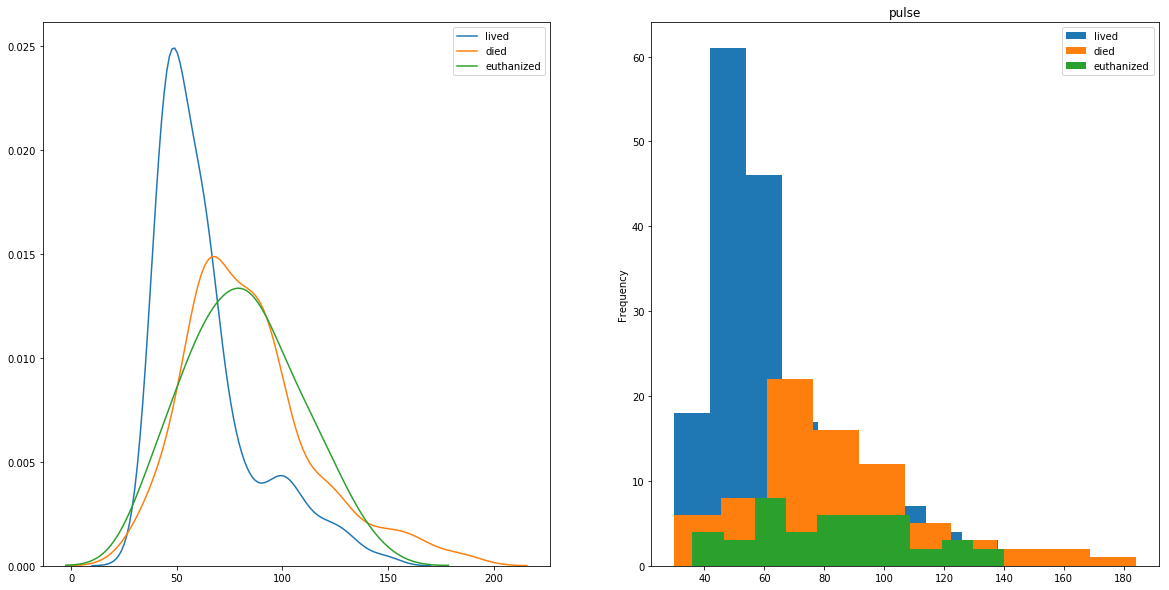

In [14]:
#pulse 
col='pulse'
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = [20,10])

y = data_merge[col][target == 2]
x = data_merge['outcome'][target == 2]
y.plot.hist(ax = ax2)
sns.kdeplot(y, ax = ax1)

y = data_merge[col][target == 0]
x = data_merge['outcome'][target == 0]
y.plot.hist(ax = ax2)
sns.kdeplot(y, ax = ax1)

y = data_merge[col][target == 1]
x = data_merge['outcome'][target == 1]
y.plot.hist(ax = ax2)
sns.kdeplot(y, ax = ax1)

plt.title(col)
ax1.legend(['lived','died','euthanized'])
ax2.legend(['lived','died','euthanized'])
plt.show()

The plots show that after approx 60, outcome is likely to be died which is then replaced by euthanized after 100. And after 150 , the probability of died being the outcome is highest.

In [15]:
# data types
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 18 columns):
hospital_number          299 non-null int64
pulse                    299 non-null float64
packed_cell_volume       299 non-null float64
total_protein            299 non-null float64
lesion_1                 299 non-null int64
surgery                  299 non-null int8
age                      299 non-null int8
temp_of_extremities      299 non-null int8
peripheral_pulse         299 non-null int8
capillary_refill_time    299 non-null int8
pain                     299 non-null int8
peristalsis              299 non-null int8
abdominal_distention     299 non-null int8
nasogastric_reflux       299 non-null int8
rectal_exam_feces        299 non-null int8
abdomen                  299 non-null int8
outcome                  299 non-null int8
surgical_lesion          299 non-null int8
dtypes: float64(3), int64(2), int8(13)
memory usage: 15.6 KB


They look normal, int and float values are not object! Also we don't have any nan values. Cleaning data part is over! Let's visualize our data to get more information.

X and Y will represent our dataset, where X - data and Y - targets 

In [16]:
Y = data_merge.outcome
X = data_merge.drop(columns="outcome")

# Decicion Tree

Les's try how it works without data normalization

In [17]:
#split data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, random_state = 42)

In [18]:
#Decicion Tree Classifier

tree = DecisionTreeClassifier(random_state = 0)#create a decision tree
tree.fit(X_train, y_train)#training this tree

print("Accuracy on the training subset: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.547


In [19]:
export_graphviz(tree, out_file = 'horsecolic_tree1.dot', 
                class_names = ['died', 'euthanized', 'lived'], 
                feature_names = X.columns,
                impurity = False, 
                filled = True)

Create a dot file with tree outputs, then transform it to .png file in command line using: dot -Tpng horsecolic_tree1.dot -o cancertree.png
![](horsecolic_tree1.png)

As we can see this tree have overfitting(100% accuracy using training data) because this tree have no limit for levels. Limitting tree means limitting the number of quastions that can be asked as we bealt it tow down. Lets limit it and will se how it change.

In [20]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.826
Accuracy on the test subset: 0.600


In [21]:
export_graphviz(tree, out_file = 'horsecolic_tree2.dot', 
                class_names = ['died', 'euthanized', 'lived'], 
                feature_names = X.columns,
                impurity = False, 
                filled = True)

The results comes better in test subset just limitting the levels of quastions.
![](horsecolic_tree2.png)

To see property of decision tree we can se the features that show us how much weight each feature carries for decision-making. We can call this parametr and when we do it each feature is attributed a number between 0 and 1. Zero meand that feature is not used for the decision process, while 1 mean that it perfectly predicts rhe target.

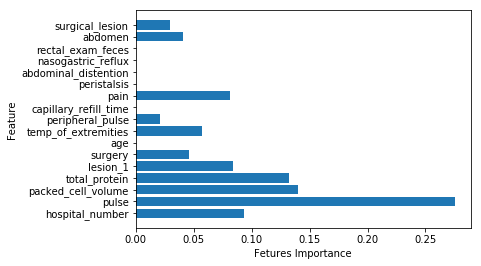

In [22]:
n_features = X.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel('Fetures Importance')
plt.ylabel('Feature')
plt.show()

Let's try now what result we can take normalizing our data.
I'll try using L1 and L2 normalization

In [23]:
data_l1 = preprocessing.normalize(X, norm = 'l1')
print("L1 - normalization: \n", data_l1)

data_l2 = preprocessing.normalize(X, norm = 'l2')
print("L2 - normalization: \n", data_l2)

L1 - normalization: 
 [[9.78888837e-01 1.21876139e-04 8.30973676e-05 ... 1.84660817e-06
  0.00000000e+00 0.00000000e+00]
 [9.95443589e-01 1.63792542e-04 9.30639442e-05 ... 0.00000000e+00
  7.44511554e-06 0.00000000e+00]
 [9.99813925e-01 7.54101321e-05 6.22133590e-05 ... 5.65575991e-06
  5.65575991e-06 0.00000000e+00]
 ...
 [9.93699023e-01 1.35149644e-04 1.12624704e-04 ... 1.87707840e-06
  0.00000000e+00 1.87707840e-06]
 [9.95536510e-01 1.87620429e-04 9.38102144e-05 ... 0.00000000e+00
  1.87620429e-06 1.87620429e-06]
 [9.88415261e-01 7.39530103e-05 6.65577092e-05 ... 0.00000000e+00
  5.54647577e-06 0.00000000e+00]]
L2 - normalization: 
 [[9.99772865e-01 1.24476296e-04 8.48702020e-05 ... 1.88600449e-06
  0.00000000e+00 0.00000000e+00]
 [9.99991447e-01 1.64540857e-04 9.34891231e-05 ... 0.00000000e+00
  7.47912985e-06 0.00000000e+00]
 [9.99999995e-01 7.54241663e-05 6.22249372e-05 ... 5.65681247e-06
  5.65681247e-06 0.00000000e+00]
 ...
 [9.99981658e-01 1.36004124e-04 1.13336770e-04 ... 1.8

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_l1, Y, stratify = Y, random_state = 42)#split data to train and test data

In [25]:
tree_l1 = DecisionTreeClassifier(max_depth = 5, random_state = 0)
tree_l1.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(tree_l1.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(tree_l1.score(X_test, y_test)))

Accuracy on the training subset: 0.844
Accuracy on the test subset: 0.600


In [26]:
export_graphviz(tree_l1, out_file = 'horsecolic_tree3.dot', 
                class_names = ['died', 'euthanized', 'lived'], 
                feature_names = X.columns,
                impurity = False, 
                filled = True)

Here we can see that L1 normalization got us no effect at accuracy on the test subset
![](horsecolic_tree3.png)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_l2, Y, stratify = Y, random_state = 42)#split data to train and test data

In [28]:
tree_l2 = DecisionTreeClassifier(max_depth = 5, random_state = 0)
tree_l2.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(tree_l2.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(tree_l2.score(X_test, y_test)))

Accuracy on the training subset: 0.839
Accuracy on the test subset: 0.627


In [29]:
export_graphviz(tree_l2, out_file = 'horsecolic_tree4.dot', 
                class_names = ['died', 'euthanized', 'lived'], 
                feature_names = X.columns,
                impurity = False, 
                filled = True)

In this situation, when we use L2 normalization, the accuracy on the test subset comes better.
![](horsecolic_tree4.png)

A single decision tree has a good predictive capacity but it is prone to overfitting on part of the data. Combining multiple trees retains the predictive power and it can reduce overfitting by averaging the results. A distinguishing powerful feature of random forest is that applies randomness when building each tree thus making each tree different and the averaging of results is done afterwards. The najor parameter we have to specify is an estimators which refers to how many trees to create.

# RandomForest

We have already seen that normalized data gives better results, so I will use normalized data in all future models.

In [30]:
#With L1 normalization
X_train, X_test, y_train, y_test = train_test_split(data_l1, Y, stratify = Y, random_state = 42)#split data to train and test data

In [31]:
forest_l1 = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 5)
score = forest_l1.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(forest_l1.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(forest_l1.score(X_test, y_test)))

Accuracy on the training subset: 0.879
Accuracy on the test subset: 0.733


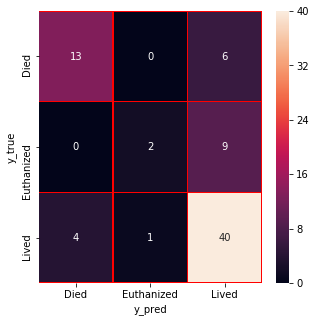

In [32]:
#confussion matrix
y_pred = forest_l1.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names = ["Died","Euthanized","Lived"]
cm = confusion_matrix(y_true, y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidth = .5, linecolor = "r", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

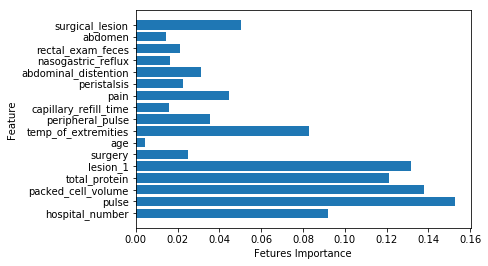

In [33]:
n_features = data_l1.shape[1]
plt.barh(range(n_features), forest_l1.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel('Fetures Importance')
plt.ylabel('Feature')
plt.show()

In [34]:
#With L2 normalization
X_train, X_test, y_train, y_test = train_test_split(data_l2, Y, stratify = Y, random_state = 42)#split data to train and test data

In [35]:
forest_l2 = RandomForestClassifier(n_estimators = 100, random_state = 0, max_depth = 5)
score = forest_l2.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(forest_l2.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(forest_l2.score(X_test, y_test)))

Accuracy on the training subset: 0.884
Accuracy on the test subset: 0.747


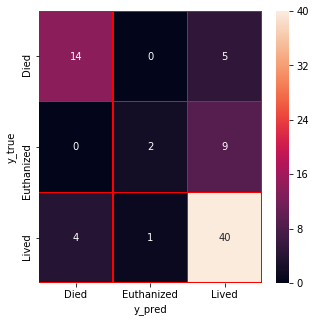

In [36]:
#confussion matrix
y_pred = forest_l2.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names = ["Died","Euthanized","Lived"]
cm = confusion_matrix(y_true, y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidth = .5, linecolor = "r", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

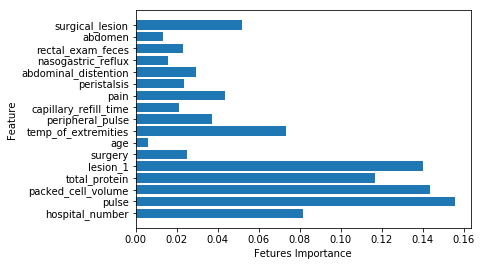

In [37]:
n_features = data_l2.shape[1]
plt.barh(range(n_features), forest_l2.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel('Fetures Importance')
plt.ylabel('Feature')
plt.show()

Using RandomForest our result comes better then using DecisionTreeClassifier. The plots show us how normalization change features that are important for model. In this case using data with L2 normalization gives us better result than data with L1 normalization.

# Logistic Regression

In [38]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\Users\leone\Anaconda3\envs\ta\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leone\Anaconda3\envs\ta\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
#With L2 normalization
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, stratify = Y, random_state = 42)#split data to train and test data

# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial')

# Train model
log_reg = clf.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(log_reg.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(log_reg.score(X_test, y_test)))

Accuracy on the training subset: 0.737
Accuracy on the test subset: 0.707


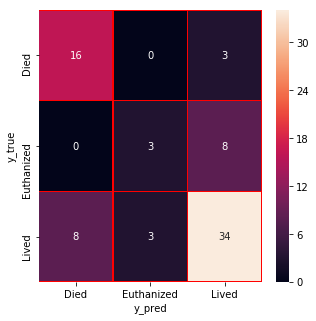

In [40]:
#confussion matrix
y_pred = log_reg.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names = ["Died","Euthanized","Lived"]
cm = confusion_matrix(y_true, y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidth = .5, linecolor = "r", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [41]:
# Create one-vs-rest logistic regression object
clf_2 = LogisticRegression(C = 0.001, random_state=0, solver = 'lbfgs', multi_class = 'multinomial')
# Train model
log_reg001 = clf_2.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(log_reg001.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.594
Accuracy on the test subset: 0.600


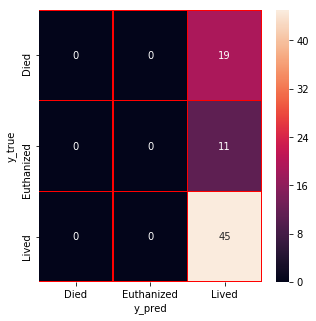

In [42]:
#confussion matrix
y_pred = log_reg001.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names = ["Died","Euthanized","Lived"]
cm = confusion_matrix(y_true, y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidth = .5, linecolor = "r", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In logistic regression we use regularization to avoid overfitting. Logistic regression uses l2 regularization by default. The main parameter which controls the strength of regularization for LR is called C. A lower value of C causes our classifier to adjust to the majority of data points while a higher C emphasizes on the correct classification of each data point. We got a good performace using LR by defult but since the accuracy score for both training and test subsets is close to one another. Chances are that we may be underfitting. Let's play with C and see how it's gona change.

In [43]:
# Create one-vs-rest logistic regression object
clf_3 = LogisticRegression(C = 100, random_state=0, solver = 'lbfgs', multi_class = 'multinomial')
# Train model
log_reg100 = clf_3.fit(X_train, y_train)

print("Accuracy on the training subset: {:.3f}".format(log_reg100.score(X_train, y_train)))
print("Accuracy on the test subset: {:.3f}".format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.741
Accuracy on the test subset: 0.680


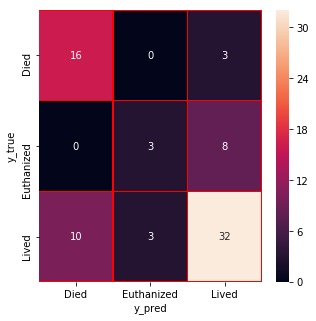

In [44]:
#confussion matrix
y_pred = log_reg100.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
names = ["Died","Euthanized","Lived"]
cm = confusion_matrix(y_true, y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidth = .5, linecolor = "r", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# GradientBoostingClassifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, stratify = Y, random_state = 42)#split data to train and test data

Accuracy of the GBM on test set: 0.640
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        19
           1       0.25      0.09      0.13        11
           2       0.70      0.78      0.74        45

   micro avg       0.64      0.64      0.64        75
   macro avg       0.51      0.50      0.49        75
weighted avg       0.60      0.64      0.61        75



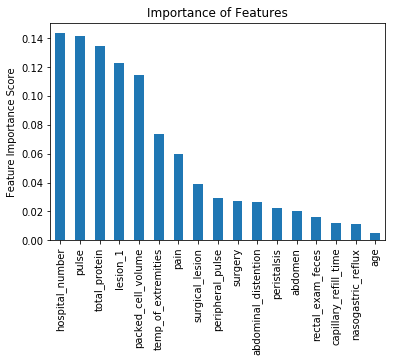

In [47]:
baseline = GradientBoostingClassifier(learning_rate = 0.1, 
                                      n_estimators = 100, 
                                      max_depth = 5, 
                                      min_samples_split = 2, 
                                      min_samples_leaf = 1, 
                                      subsample = 1, 
                                      max_features = 'log2', 
                                      random_state = 42)

baseline.fit(X_train, y_train)
predictors = X.columns
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

The results I obtained could have been worse if the data had not been cleared beforehand. Experiments have shown that the RandomForest method has done the best job with 74% of accuracy.